In [2]:
import pandas as pd

### Exploracion del Dataset

In [3]:
df = pd.read_csv("../dataset/guatedata.csv")
df.head()

,vedadc_n,vantig_n,vnline_n,vgamma_c,veaseg_c,vctcpl_n,vccdeu_n,vccdeu_n.1,ttkbco_n,vtarge_c
0,60.0,NaN,1,PREMIUM PLUS,n,45,1,1,2439779,0
1,66.0,NaN,1,ALTA,n,71,8,8,0,0
2,NaN,141.0,1,PREMIUM,n,73,25,25,0,0
3,116.0,NaN,2,NaN,n,7,0,0,0,0
4,50.0,NaN,3,ALTA,n,42,7,7,1969990,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   vedadc_n    778 non-null    float64
 1   vantig_n    496 non-null    float64
 2   vnline_n    926 non-null    int64  
 3   vgamma_c    734 non-null    object 
 4   veaseg_c    926 non-null    object 
 5   vctcpl_n    926 non-null    int64  
 6   vccdeu_n    926 non-null    int64  
 7   vccdeu_n.1  926 non-null    int64  
 8   ttkbco_n    926 non-null    int64  
 9   vtarge_c    926 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 72.5+ KB


In [9]:
df.isna().sum()

vedadc_n      148
vantig_n      430
vnline_n        0
vgamma_c      192
veaseg_c        0
vctcpl_n        0
vccdeu_n        0
vccdeu_n.1      0
ttkbco_n        0
vtarge_c        0
dtype: int64

In [11]:
df[df['vantig_n'].isna()]   #EXISTE MUCHOS NAN, ESTOS VALORES SE ELIMINARAN

,vedadc_n,vantig_n,vnline_n,vgamma_c,veaseg_c,vctcpl_n,vccdeu_n,vccdeu_n.1,ttkbco_n,vtarge_c
0,60.0,NaN,1,PREMIUM PLUS,n,45,1,1,2439779,0
1,66.0,NaN,1,ALTA,n,71,8,8,0,0
3,116.0,NaN,2,NaN,n,7,0,0,0,0
4,50.0,NaN,3,ALTA,n,42,7,7,1969990,0
5,54.0,NaN,2,PREMIUM PLUS,n,27,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
894,55.0,NaN,1,PREMIUM PLUS,n,18,6,6,0,1
898,NaN,NaN,1,BAJA,n,6,3,3,0,1
905,51.0,NaN,1,NaN,n,2,1,1,0,1
911,28.0,NaN,6,PREMIUM PLUS,n,15,1,1,0,1


### LIMPIEZA DE DATOS

In [57]:
df_c = df.copy()

In [58]:
df_c = df_c.dropna()
df_c.isna().sum()

vedadc_n      0
vantig_n      0
vnline_n      0
vgamma_c      0
veaseg_c      0
vctcpl_n      0
vccdeu_n      0
vccdeu_n.1    0
ttkbco_n      0
vtarge_c      0
dtype: int64

In [59]:
df_c.head()

,vedadc_n,vantig_n,vnline_n,vgamma_c,veaseg_c,vctcpl_n,vccdeu_n,vccdeu_n.1,ttkbco_n,vtarge_c
7,50.0,66.0,2,PRIMIUM PLUS,s,38,11,11,1653464,0
17,59.0,122.0,1,PREMIUM PLUS,n,18,0,0,1619325,0
21,39.0,153.0,1,PREMIUM PLUS,n,23,0,0,4494649,0
23,62.0,141.0,1,PREMIUM,n,32,0,0,0,0
28,33.0,135.0,1,ALTA,n,17,4,4,2194902,0


In [132]:
df_c = df_c.drop(columns='vccdeu_n.1')              #SE ELIMINO ESA COLUMNA PUESTO QUE ES UNA COLUMNA REPETIDA
df_c.head()

,vedadc_n,vantig_n,vnline_n,vgamma_c,veaseg_c,vctcpl_n,vccdeu_n,ttkbco_n,vtarge_c
7,50.0,66.0,2,PREMIUM PLUS,1,38,11,1653464,0
17,59.0,122.0,1,PREMIUM PLUS,0,18,0,1619325,0
21,39.0,153.0,1,PREMIUM PLUS,0,23,0,4494649,0
23,62.0,141.0,1,PREMIUM,0,32,0,0,0
28,33.0,135.0,1,ALTA,0,17,4,2194902,0


In [133]:
df_c['vtarge_c'].value_counts()             #No existe un gran desbalance de datos en la variable independiente

0    205
1    138
Name: vtarge_c, dtype: int64

### MODELAMIENTO DE DATOS

In [134]:
df_c['veaseg_c'].unique()         #3 tipos de valores diferentes
                                #El SI se cambiara con 1 y el NO se cambiara con 0

array([1, 0], dtype=int64)

In [135]:
df_c['vgamma_c'].unique()               #ACA SE REALIZARA ONEHOTENCODING, PUESTO QUE TIENE VARIOS VALORES CATEGORICOS

array(['PREMIUM PLUS', 'PREMIUM', 'ALTA', 'MEDIA', 'BAJA'], dtype=object)

In [136]:
df_c['veaseg_c'] = df_c['veaseg_c'].replace(to_replace=['s','n'], value=[1,0])
df_c.head()

,vedadc_n,vantig_n,vnline_n,vgamma_c,veaseg_c,vctcpl_n,vccdeu_n,ttkbco_n,vtarge_c
7,50.0,66.0,2,PREMIUM PLUS,1,38,11,1653464,0
17,59.0,122.0,1,PREMIUM PLUS,0,18,0,1619325,0
21,39.0,153.0,1,PREMIUM PLUS,0,23,0,4494649,0
23,62.0,141.0,1,PREMIUM,0,32,0,0,0
28,33.0,135.0,1,ALTA,0,17,4,2194902,0


In [137]:
df_c['vgamma_c'] = df_c['vgamma_c'].replace(to_replace=['PRIMIUM PLUS', 'PREMIUN PLUS'], value='PREMIUM PLUS')
df_c['vgamma_c'] = df_c['vgamma_c'].replace('ALTAa', 'ALTA')
df_c['vgamma_c'].unique()

array(['PREMIUM PLUS', 'PREMIUM', 'ALTA', 'MEDIA', 'BAJA'], dtype=object)

### VISUALIZACION DE DATOS

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

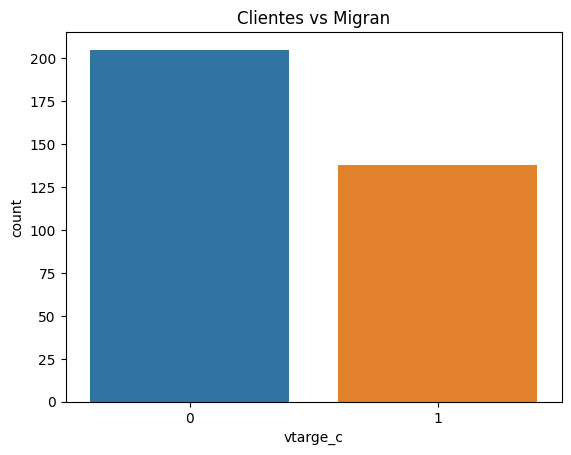

In [139]:
sns.countplot(data=df_c, x='vtarge_c')
plt.title('Clientes vs Migran')
plt.show()

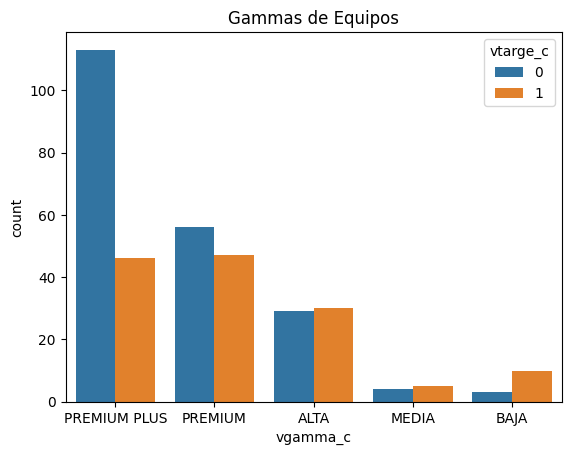

In [140]:
sns.countplot(data=df_c, x='vgamma_c', hue='vtarge_c')
plt.title('Gammas de Equipos')
plt.show()

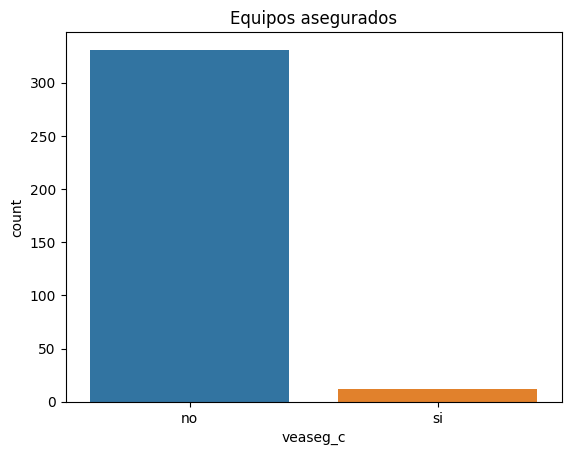

In [141]:
sns.countplot(data=df_c, x='veaseg_c')
plt.title('Equipos asegurados')
x=[0,1]
labels = ['no', 'si']
plt.xticks(x,labels)
plt.show()

Text(0.5, 1.0, 'Edad del cliente')

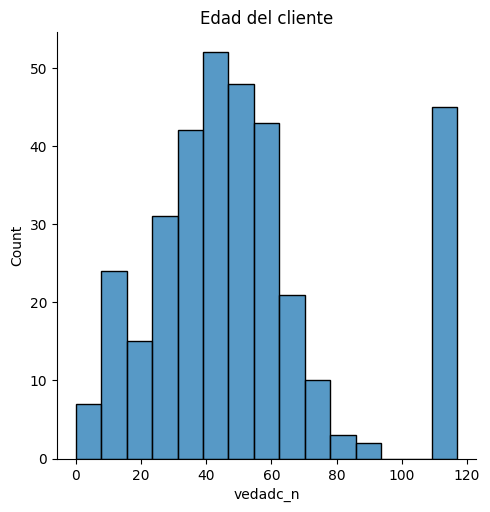

In [142]:
sns.displot(data=df_c, x='vedadc_n')
plt.title("Edad del cliente")

Text(0.5, 1.0, 'Antiguedad de cliente en meses')

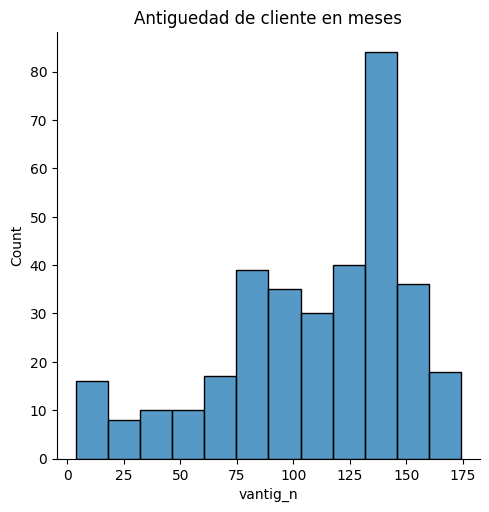

In [143]:
sns.displot(data=df_c, x='vantig_n')
plt.title("Antiguedad de cliente en meses")

Text(0.5, 1.0, 'Numero de lineas con las que cuenta el cliente')

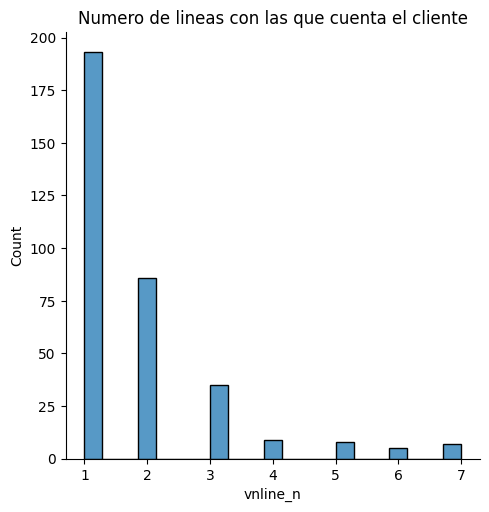

In [144]:
sns.displot(data=df_c, x='vnline_n')
plt.title("Numero de lineas con las que cuenta el cliente")

Text(0.5, 1.0, 'Cantidad total de cambios de plan')

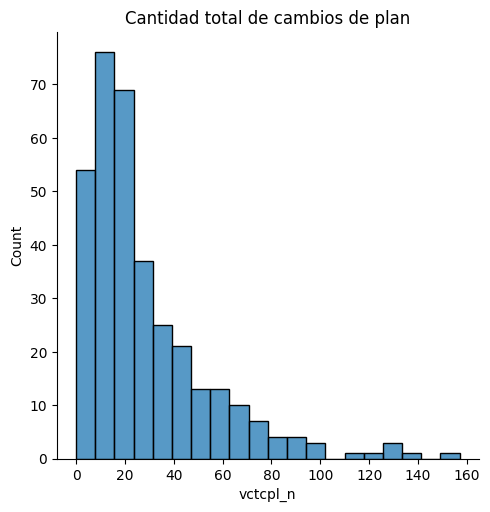

In [145]:
sns.displot(data=df_c, x='vctcpl_n')
plt.title("Cantidad total de cambios de plan")

Text(0.5, 1.0, 'Cantidad de cortes por deuda')

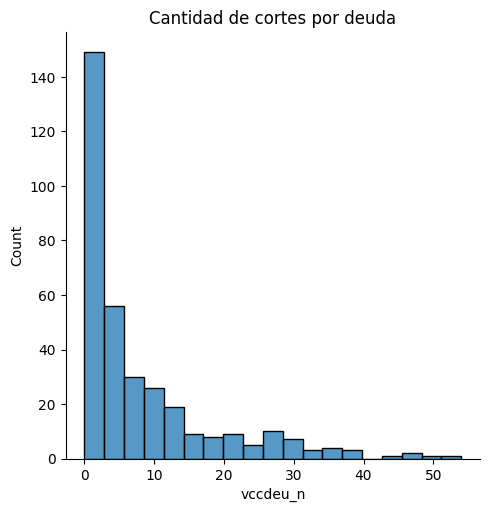

In [147]:
sns.displot(data=df_c, x='vccdeu_n')
plt.title("Cantidad de cortes por deuda")

- Los valores de la variable independiente estan balanceados
- La mayoria de clientes que se quedan en la empresa tienen un equipo de Gamma PREMIUM PLUS, puede ser porque sacaron el equipo con un contrato con la empresa
- La mayoria de personas no tienen su equipo asegurado
- La mayoria de clientes tienen una edad promedio de 50 años
- Existen una gran cantidad de clientes con 110 años aprox, esto debe ser un error por ser un valor atipico en la edad de una persona
- La mayoria de clientes son fieles a la empresa, esto se observa a la antiguedad de sus meses
- La mayoria de clientes solo tienen 1 linea, que debe ser la de uso propio
- La mayoria de clientes aprenden a pagar sus deudas despues de que le hayan cortado las primeras veces

### SEPARACION DE DATOS

In [84]:
from sklearn.model_selection import train_test_split

In [148]:
x = df_c.drop(columns='vtarge_c', axis=1)
y = df_c['vtarge_c']

In [194]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

### MODELOS ML

##### RANDOM FOREST

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [186]:
ohe = OneHotEncoder()
ohe.fit(x[['vgamma_c']])

OneHotEncoder()

In [187]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['vgamma_c']),
                                        remainder='passthrough')
model_rf = RandomForestClassifier()

In [195]:
pipe = make_pipeline(column_trans,model_rf)             #CREE UN PIPELINE PARA PRIMERO TRANSFORMAR LA COLUMNA VGAMMA CON OHE
                                                        #LUEGO SE UITLIZARA EL MODEL RANDOM FOREST

In [196]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['ALTA', 'BAJA', 'MEDIA', 'PREMIUM', 'PREMIUM PLUS'], dtype=object)]),
                                                  ['vgamma_c'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [197]:
y_pred=pipe.predict(x_test)

In [198]:
metrics.accuracy_score(y_test, y_pred)

0.8985507246376812

In [199]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90        38
           1       0.83      0.97      0.90        31

    accuracy                           0.90        69
   macro avg       0.90      0.90      0.90        69
weighted avg       0.91      0.90      0.90        69



Como se puede observar, se ha obtenido resultados aproximados al 90% en precision, recall y f1, dando a entender que no existe valores atipicos en FP, FN, TP o TN

In [200]:
cm =metrics.confusion_matrix(y_test, y_pred)
cm

array([[32,  6],
       [ 1, 30]], dtype=int64)

Como se mostraba en el F1 Score, los valores de Falsos negativos y Falsos positivos son diminutos a comparacion de los verdaderos positivos y negativos

##### LOGISTIC REGRESSION

In [201]:
from sklearn.linear_model import LogisticRegression

In [202]:
lr = LogisticRegression()

In [203]:
pipe_lr = make_pipeline(column_trans, lr)

In [204]:
pipe_lr.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['ALTA', 'BAJA', 'MEDIA', 'PREMIUM', 'PREMIUM PLUS'], dtype=object)]),
                                                  ['vgamma_c'])])),
                ('logisticregression', LogisticRegression())])

In [205]:
y_pred = pipe_lr.predict(x_test)

In [206]:
metrics.accuracy_score(y_test, y_pred)

0.5652173913043478

In [207]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        38
           1       1.00      0.03      0.06        31

    accuracy                           0.57        69
   macro avg       0.78      0.52      0.39        69
weighted avg       0.76      0.57      0.42        69



In [208]:
cm =metrics.confusion_matrix(y_test, y_pred)
cm

array([[38,  0],
       [30,  1]], dtype=int64)

- Aca se puede observar que los falsos negativos es un valor demasiado grande, lo cual hace que la precisión y el F1-score tengan esos valores
- En este caso se puede mejorar el modelo o profundizar en la razon del porque los falsos negativos son tan grandes
- Por ahora, este modelo no sera escogido

##### XGBOOST

In [209]:
from xgboost import XGBClassifier

In [210]:
xg = XGBClassifier(n_estimators=100, max_depth=2, learning_rate=0.1, objective='binary:logistic')

In [211]:
pipe_xg = make_pipeline(column_trans, xg)

In [212]:
pipe_xg.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['ALTA', 'BAJA', 'MEDIA', 'PREMIUM', 'PREMIUM PLUS'], dtype=object)]),
                                                  ['vgamma_c'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=2, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, ...))])

In [213]:
y_pred = pipe_xg.predict(x_test)

In [214]:
metrics.accuracy_score(y_test, y_pred)

0.8985507246376812

In [215]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90        38
           1       0.83      0.97      0.90        31

    accuracy                           0.90        69
   macro avg       0.90      0.90      0.90        69
weighted avg       0.91      0.90      0.90        69



In [216]:
cm =metrics.confusion_matrix(y_test, y_pred)
cm

array([[32,  6],
       [ 1, 30]], dtype=int64)

Este modelo es mejor que el Logistic Regression y tiene el mismo resultado del Random Forest. Por ende, cualquier modelo entre RF y XGBOOST puede ser elegido

Cabe recalcar que para obtener mejores resultados se deberia entrar a una etapa de tuning para hallar los mejores parametros para nuestros modelos y además, ver el tiempo de ejecución. No obstante, como este es un modelo creado para la presentación y no sera enviado a producción, esta etapa se esta obviando.

### EXPORTACION DEL MODELO

In [217]:
import pickle

In [220]:
pickle.dump(pipe,open('../models/model.pkl','wb'))
pickle.dump(df_c,open('../models/df.pkl','wb'))

In [222]:
df_c.head()

,vedadc_n,vantig_n,vnline_n,vgamma_c,veaseg_c,vctcpl_n,vccdeu_n,ttkbco_n,vtarge_c
7,50.0,66.0,2,PREMIUM PLUS,1,38,11,1653464,0
17,59.0,122.0,1,PREMIUM PLUS,0,18,0,1619325,0
21,39.0,153.0,1,PREMIUM PLUS,0,23,0,4494649,0
23,62.0,141.0,1,PREMIUM,0,32,0,0,0
28,33.0,135.0,1,ALTA,0,17,4,2194902,0


In [221]:
import numpy as np